In [32]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("C:/Users/DSNikhil/Downloads/Codes and Corresponding files/ETM Data_Selected/031116/ADY_031116.csv")
df_source = df[df['Source']=='KELAMBAKKA']
df_source_destination = df_source[df_source['Destination']=='T.NAGAR   ']
df_source_destination = df_source_destination.reset_index(drop=True)
df_source_destination_trip = df_source_destination[df_source_destination['TripStartTime']=='15:07:08']
df_source_destination_trip = df_source_destination_trip.reset_index(drop=True)

In [34]:
all_stages_19B_dataframe = pd.read_csv("C:/Users/DSNikhil/Downloads/Codes and Corresponding files/Chapter 5 Crowding Estimation and Prediction/Stage to Stop Mapping/19B_Kelambakkam_T.Nagar_3_11 stages list_Adyar depo (ordered).csv")
all_stages_19B = np.array(all_stages_19B_dataframe['Stage_name'])

In [35]:
Stage = []
Ticket_issued_time = []
for stage in all_stages_19B:
    df_source_destination_trip_stage = df_source_destination_trip[df_source_destination_trip['FromStage']==stage]
    tickets_array = np.array(df_source_destination_trip_stage['TicketIssuedTime'])
    for i in range(len(tickets_array)):
        Ticket_issued_time.append(tickets_array[i])
        Stage.append(stage)
Stage = np.array(Stage)
Ticket_issued_time = np.array(Ticket_issued_time)
d = {'Stage':Stage,'Ticket_issued_time':Ticket_issued_time}
df_stages_tickets = pd.DataFrame(data=d)

In [36]:
df_stages_tickets['Ticket_issued_time'] = pd.to_datetime(df_stages_tickets['Ticket_issued_time'])

In [37]:
df_stages_tickets = df_stages_tickets.sort_values(by=['Ticket_issued_time'])
df_stages_tickets = df_stages_tickets.reset_index(drop=True)
df_stages_tickets

,Stage,Ticket_issued_time
0,KELAMBAKKA,2020-07-09 15:39:59
1,KELAMBAKKA,2020-07-09 15:40:19
2,KELAMBAKKA,2020-07-09 15:40:30
3,KELAMBAKKA,2020-07-09 15:42:30
4,HINDUSTAN,2020-07-09 15:44:26
5,HINDUSTAN,2020-07-09 15:44:29
6,HINDUSTAN,2020-07-09 15:45:07
7,HINDUSTAN,2020-07-09 15:45:22
8,HINDUSTAN,2020-07-09 15:45:38
9,HINDUSTAN,2020-07-09 15:45:44


In [38]:
time_since_departure_minutes = []
time_since_departure_minutes.append(0)
for i in range(1,np.shape(df_stages_tickets)[0]):
    t = df_stages_tickets['Ticket_issued_time'][i] - df_stages_tickets['Ticket_issued_time'][0]
    t = t.total_seconds() / 60
    time_since_departure_minutes.append(t)
time_since_departure_minutes = np.array(time_since_departure_minutes)

In [39]:
df_stages_tickets['Time_since_departure_minutes'] = time_since_departure_minutes

In [40]:
df_stages_tickets

,Stage,Ticket_issued_time,Time_since_departure_minutes
0,KELAMBAKKA,2020-07-09 15:39:59,0.000000
1,KELAMBAKKA,2020-07-09 15:40:19,0.333333
2,KELAMBAKKA,2020-07-09 15:40:30,0.516667
3,KELAMBAKKA,2020-07-09 15:42:30,2.516667
4,HINDUSTAN,2020-07-09 15:44:26,4.450000
5,HINDUSTAN,2020-07-09 15:44:29,4.500000
6,HINDUSTAN,2020-07-09 15:45:07,5.133333
7,HINDUSTAN,2020-07-09 15:45:22,5.383333
8,HINDUSTAN,2020-07-09 15:45:38,5.650000
9,HINDUSTAN,2020-07-09 15:45:44,5.750000


In [41]:
#Natural Breaks Optimization
#Kernel Density Estimation

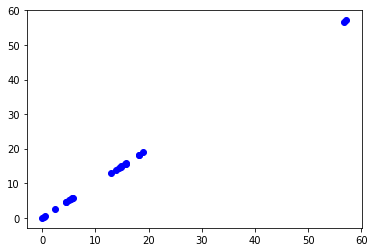

In [42]:
#plot of time since departure for all tickets
plt.scatter(x=df_stages_tickets['Time_since_departure_minutes'],y=df_stages_tickets['Time_since_departure_minutes'],c='b')
plt.show()

In [43]:
df_stages_tickets_kelambakka = df_stages_tickets[df_stages_tickets['Stage']=='KELAMBAKKA']
df_stages_tickets_kelambakka = df_stages_tickets_kelambakka.reset_index(drop=True)

In [44]:
df_stages_tickets_Navalur = df_stages_tickets[df_stages_tickets['Stage']=='NAVALUR   ']
df_stages_tickets_Navalur = df_stages_tickets_Navalur.reset_index(drop=True)

In [45]:
df_stages_tickets_kelambakka

,Stage,Ticket_issued_time,Time_since_departure_minutes
0,KELAMBAKKA,2020-07-09 15:39:59,0.000000
1,KELAMBAKKA,2020-07-09 15:40:19,0.333333
2,KELAMBAKKA,2020-07-09 15:40:30,0.516667
3,KELAMBAKKA,2020-07-09 15:42:30,2.516667


In [46]:
df_stages_tickets_Navalur

,Stage,Ticket_issued_time,Time_since_departure_minutes
0,NAVALUR,2020-07-09 15:53:56,13.950000
1,NAVALUR,2020-07-09 15:54:28,14.483333
2,NAVALUR,2020-07-09 15:54:48,14.816667
3,NAVALUR,2020-07-09 15:54:54,14.916667
4,NAVALUR,2020-07-09 15:55:30,15.516667
5,NAVALUR,2020-07-09 15:55:41,15.700000
6,NAVALUR,2020-07-09 15:55:45,15.766667


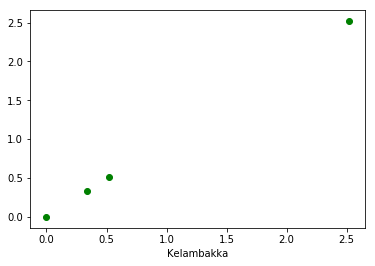

In [47]:
#plot of time since departure for tickets issued at Stage Kelambakka 
plt.scatter(x=df_stages_tickets_kelambakka['Time_since_departure_minutes'],y=df_stages_tickets_kelambakka['Time_since_departure_minutes'],c='g')
plt.xlabel('Kelambakka')
plt.show()

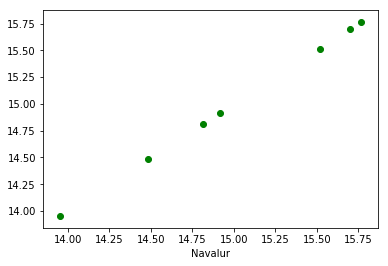

In [48]:
#plot of time since departure for tickets issued at Stage Navalur 
plt.scatter(x=df_stages_tickets_Navalur['Time_since_departure_minutes'],y=df_stages_tickets_Navalur['Time_since_departure_minutes'],c='g')
plt.xlabel('Navalur')
plt.show()

In [77]:
x = np.array(df_stages_tickets_Navalur['Time_since_departure_minutes'])
#x = x*60
b = zip(x,np.zeros(len(x)))
c = list(zip(x,np.zeros(len(x))))
d = np.array(c)

In [78]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(d, quantile=0.5)

In [79]:
bandwidth

0.39285714285714424

In [80]:
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)

In [81]:
ms

MeanShift(bandwidth=0.39285714285714424, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=None, seeds=None)

In [82]:
ms.fit(d)
labels = ms.labels_

In [83]:
labels

array([2, 1, 1, 1, 0, 0, 0], dtype=int64)

In [84]:
cluster_centers = ms.cluster_centers_

In [85]:
cluster_centers

array([[15.66111111,  0.        ],
       [14.73888889,  0.        ],
       [14.21666667,  0.        ]])

In [86]:
labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

In [87]:
for k in range(n_clusters):
    my_members = labels==k
    print ("Cluster {0}: {1}".format(k, d[my_members, 0]))

Cluster 0: [15.51666667 15.7        15.76666667]
Cluster 1: [14.48333333 14.81666667 14.91666667]
Cluster 2: [13.95]
